In [0]:
#Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras import models
from tensorflow.keras import layers
from google.colab import files

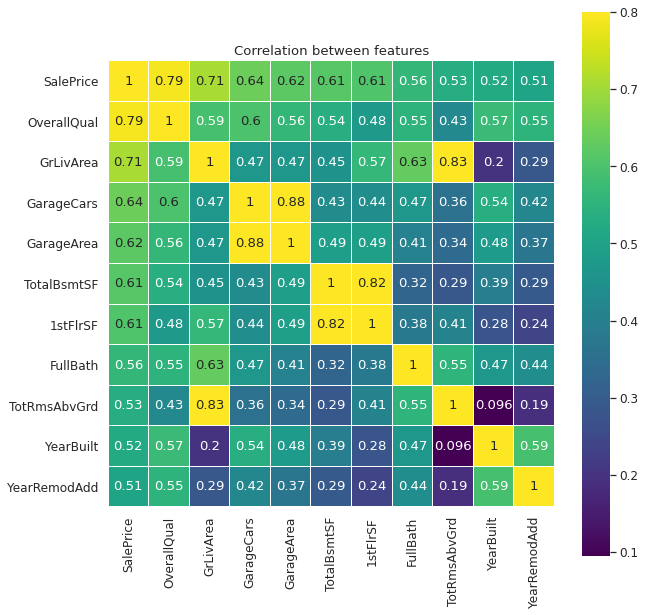

In [4]:
#Configure Correlation Map
sns.set(style = "whitegrid", color_codes = True)
sns.set(font_scale = 1.1)

#Prepare Training Data
houseTrain = pd.read_csv("houseTrain.csv")
houseTrain.fillna(0, inplace = True)

#Correlation Matrix Features
corrMatrix = houseTrain[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
                         "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt",
                         "YearRemodAdd"]].corr()

#Create Heatmap of Feature Correlations
sns.heatmap(corrMatrix, vmax = 0.8, linewidths = 0.01,
            square = True, annot = True, cmap = "viridis", linecolor = "white")

#Configure and Display Plot
plt.figure(figsize = (10, 10))
plt.title("Correlation between features")
plt.show()

In [0]:
#Normalize Training Data
MinMaxScaler = preprocessing.MinMaxScaler()
xTrain = MinMaxScaler.fit_transform(np.array(houseTrain[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF",
                                                         "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]]))
xTrain = xTrain * 10000
yTrain = np.array(houseTrain["SalePrice"])

#Build the Model
model = models.Sequential([
        layers.Dense(128, input_shape = xTrain.shape, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(1, activation = "linear")        
        ])

#Compile the Model
model.compile(optimizer = "adam", loss = "mae")

#Model History
modelHistory = model.fit(xTrain, yTrain, epochs = 500, validation_split = 0.2)

#Configure Plot and Display Model Loss
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of the model")
plt.plot(modelHistory.history["loss"])
plt.show()

In [0]:
#Prepare Testing Data
houseTest = pd.read_csv("houseTest.csv")
houseTest.fillna(0, inplace = True)

#Normalize Testing Data
xTest = MinMaxScaler.transform(np.array(houseTest[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]]))
xTest = xTest * 10000

#Model's Predictions on Testing Data
predictions = model.predict(xTest)

#Storing Predictions in a CSV File
submission = pd.read_csv("houseSampleSubmission.csv")
del submission["SalePrice"]
submission["SalePrice"] = predictions

#Downloading the Predictions CSV
submission.to_csv("submission.csv", index = False)
files.download("submission.csv")